In [17]:
import  pandas as pd 
import matplotlib.pyplot as plt 


In [18]:
titanic = pd.read_csv('../data/train_titanic.csv')

#### What is the survival rate on the ship?

How do I calculate this?

In [19]:
## mean of survived column
titanic['Survived'].mean()

0.3838383838383838

####  what is the child survival rate? 


In [20]:
kid_filter = (titanic['Age'] < 18 )

titanic.loc[kid_filter, 'Survived'].mean()

0.5398230088495575

#### What is the survival rate of passengers from cherbourg (`c` in the dataframe) ?

In [21]:
### using boolean filtering 

c_filter = titanic['Embarked'] == 'C'

titanic.loc[c_filter, 'Survived'].mean()

0.5535714285714286

#### A Mask for all of the "S" columns

In [22]:
### making the mask using a list comprehension 
s_mask =  [True if col[0] == 'S' else False for col in titanic.columns]

titanic.loc[:,s_mask].head()

,Survived,Sex,SibSp
0,0,male,1
1,1,female,1
2,1,female,0
3,1,female,1
4,0,male,0


In [23]:
[True if col[0] == 'S' else False for col in titanic.columns]

[False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False]

In [24]:
## A manual mask the achieves the same result 
titanic.loc[:,[False, True, False, False, True, False, True, False, False, False, False, False]].head()

,Survived,Sex,SibSp
0,0,male,1
1,1,female,1
2,1,female,0
3,1,female,1
4,0,male,0


### I want a new column - 18 and under as "child" 19-49 as "adult" 50 and over as "senior" how do I do that?


First we need to deal with the null values - a few options 

In [25]:
## titanic has null values 
titanic['Age'] = titanic['Age'].fillna(-99)

In [26]:
### Option 1 to fill nulls 


In [27]:
## Boolean filter option to fill age (using 99 right now  )


In [28]:
### drop where age = -99 (this dataframe isn't being returned - not saved as a variable)
age_filter =  titanic['Age'] != -99

titanic = titanic.loc[age_filter,:].copy()

In [29]:
### setting up my function that takes in an age and returns 'Child' if the age is below 18, 'Adult' if between 18 and 60 and 'Senior' if above 60

In [30]:
n = 70
if n <= 18:
    print('Child')
elif n <= 60:
    print('Adult')
else:
    print('Senior')


Senior


In [31]:
def age_binner(cell):
    if cell <= 18:
        return 'Child'
    elif cell <= 60:
        return 'Adult'
    else:
        return 'Senior'
    
titanic['Age_binned'] = titanic['Age'].map(age_binner)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult


In [32]:
## function returns "Adult" when you input 22


In [33]:
## function returns "Child" when you input 17


In [44]:
# function returns "Senior when you input 65


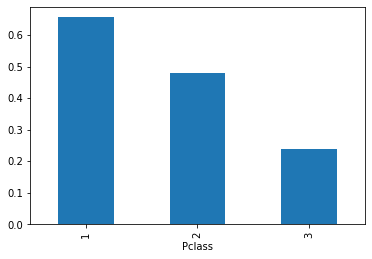

In [47]:
## groupby statement 

titanic.groupby('Pclass')['Survived'].mean().plot.bar();

#### Plotting with groupby 

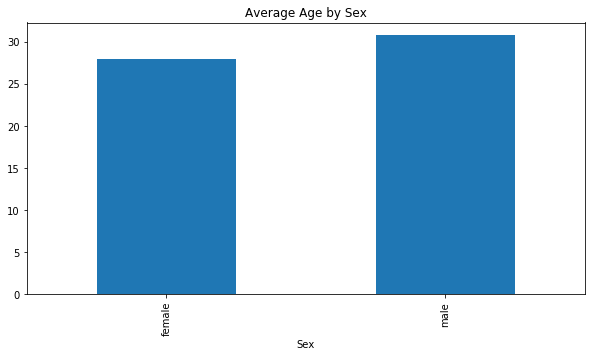

In [50]:
### groupby plot 

fig , test_axis = plt.subplots(figsize=(10,5))
titanic.groupby('Sex')['Age'].mean().plot.bar(ax=test_axis)
test_axis.set_title('Average Age by Sex');

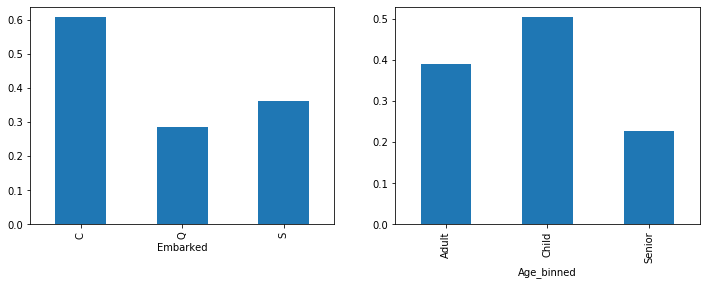

In [54]:
## both nrows and ncols 

fig , (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,4))

titanic.groupby('Embarked')['Survived'].mean().plot.bar(ax=ax1)
titanic.groupby('Age_binned')['Survived'].mean().plot.bar(ax=ax2);

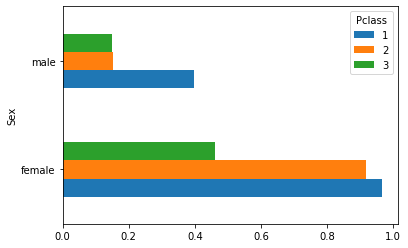

In [57]:
### 
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().plot.barh();

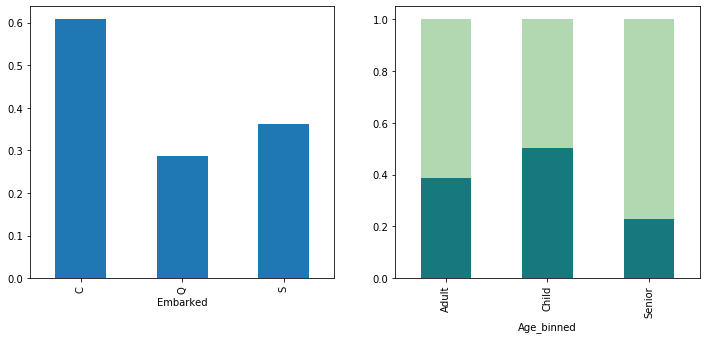

In [61]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

titanic.groupby('Embarked')['Survived'].mean().plot.bar(ax=ax1)
titanic.groupby('Age_binned')['Survived'].mean().plot.bar(ax=ax2);
titanic.groupby('Age_binned')['Survived'].max().plot.bar(ax=ax2, alpha=.3, color='green');


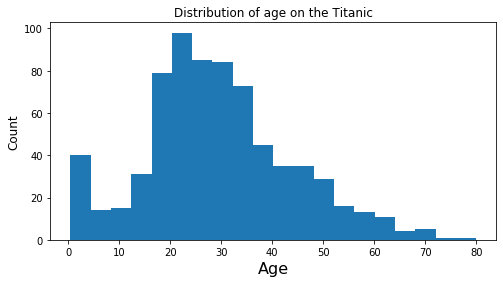

In [71]:
fig, ax = plt.subplots(figsize=(8,4))

ax.hist(titanic['Age'], bins=20)

ax.set_title('Distribution of age on the Titanic')
ax.set_ylabel('Count', size=12) 
ax.set_xlabel('Age', size=16);

In [ ]:
ax.set_y